# Deep Learning Frameworks

## Comparison

<img src="https://picpig.com/tssyqjjxdz.png">

more details at http://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-software-frameworks-upc-2016

## We start from theano

Theano features:

- integration with NumPy
- effective analytical computation of gradient (can automatically build expressions to compute gradient)
- fast and stable optimization (can recognize numerical inaccurate expressions and compute them using more stable algorithms)
- transparent usage of GPU
- dynamic C++ code generation


<small>more details at http://theano.readthedocs.io/en/latest/</small>

## Installation

#### prerequisites
- If you want fast compiled code (recommended), make sure you have g++ (Windows/Linux) or Clang (OS X) installed.
- miniconda
- `conda install numpy scipy mkl <nose> <sphinx> <pydot-ng>`
- see link below for GPU installation details

#### theano itself
- ```pip install Theano[test, doc]```
- install `libgpuarray`, http://bit.ly/2eeynjd


<small>more details http://theano.readthedocs.io/en/latest/install_macos.html</small>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy

## Import 

In [2]:
# next line is a convention
import theano.tensor as T
import theano

## Symbolic expessions for tensors
Theano’s strength is in expressing symbolic calculations involving tensors. There are many types of symbolic expressions for tensors:

* scalar
* vector
* matrix
* tensor
* ...

# Warming up
* Implement a function that computes the sum of squares of numbers from 0 to N
* Use numpy or python
* An array of numbers 0 to N - numpy.arange(N)

In [3]:
import numpy as np
def sum_squares(N):
    return <student.Implement_me()>

SyntaxError: invalid syntax (<ipython-input-3-61d111562c12>, line 3)

In [ ]:
%%time
sum_squares(10**8)

# theano teaser

Doing the very same thing

In [ ]:
import theano
import theano.tensor as T

In [ ]:
#I gonna be function parameter
N = T.scalar("a dimension",dtype='int32')


#i am a recipe on how to produce sum of squares of arange of N given N
result = (T.arange(N)**2).sum()

#Compiling the recipe of computing "result" given N
sum_function = theano.function(inputs = [N],outputs=result)

In [ ]:
%%time
sum_function(10**8)

# How does it work?
__if you're currently in classroom, chances are i am explaining this text wall right now__
* 1 You define inputs f your future function;
* 2 You write a recipe for some transformation of inputs;
* 3 You compile it;
* You have just got a function!
* The gobbledegooky version: you define a function as symbolic computation graph.


* There are two main kinвs of entities: "Inputs" and "Transformations"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be integers, floats of booleans (uint8) of various size.


* An input is a placeholder for function parameters.
 * N from example above


* Transformations are the recipes for computing something given inputs and transformation
 * (T.arange(N)^2).sum() are 3 sequential transformations of N
 * Doubles all functions of numpy vector syntax
 * You can almost always go with replacing "np.function" with "T.function" aka "theano.tensor.function"
   * np.mean -> T.mean
   * np.arange -> T.arange
   * np.cumsum -> T.cumsum
   * and so on.
   * builtin operations also work that way
   * np.arange(10).mean() -> T.arange(10).mean()
   * Once upon a blue moon the functions have different names or locations (e.g. T.extra_ops)
     * Ask us or google it
 
 
Still confused? We gonna fix that.

In [ ]:
#Inputs
example_input_integer = T.scalar("scalar input",dtype='float32')

example_input_tensor = T.tensor4("four dimensional tensor input") #dtype = theano.config.floatX by default
#не бойся, тензор нам не пригодится



input_vector = T.vector("", dtype='int32') # vector of integers


In [ ]:
#Transformations

#transofrmation: elementwise multiplication
double_the_vector = input_vector*2

#elementwise cosine
elementwise_cosine = T.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector**2 - input_vector


In [ ]:
#Practice time:
#create two vectors of size float32
my_vector = student.init_float32_vector()
my_vector2 = student.init_one_more_such_vector()

In [ ]:
#Write a transformation(recipe):
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = student.implementwhatwaswrittenabove()

In [ ]:
print my_transformation
#it's okay it aint a number

# Compiling
* So far we were using "symbolic" variables and transformations
 * Defining the recipe for computation, but not computing anything
* To use the recipe, one should compile it

In [ ]:
inputs = [<two vectors that my_transformation depends on>]
outputs = [<What do we compute (can be a list of several transformation)>]

# The next lines compile a function that takes two vectors and computes your transformation
my_function = theano.function(
    inputs,outputs,
    allow_input_downcast=True #automatic type casting for input parameters (e.g. float64 -> float32)
 )

In [ ]:
#using function with, lists:
print "using python lists:"
print my_function([1,2,3],[4,5,6])
print

#Or using numpy arrays:
#btw, that 'float' dtype is casted to secong parameter dtype which is float32
print "using numpy arrays:"
print my_function(np.arange(10),
                  np.linspace(5,6,10,dtype='float'))


# Debugging
* Compilation can take a while for big functions
* To avoid waiting, one can evaluate transformations without compiling
* Without compilation, the code runs slower, so consider reducing input size


In [ ]:
#a dictionary of inputs
my_function_inputs = {
    my_vector:[1,2,3],
    my_vector2:[4,5,6]
}

# evaluate my_transformation
# has to match with compiled function output
print my_transformation.eval(my_function_inputs)


# can compute transformations on the fly
print "add 2 vectors", (my_vector + my_vector2).eval(my_function_inputs)

#!WARNING! if your transformation only depends on some inputs,
#do not provide the rest of them
print "vector's shape:", my_vector.shape.eval({
        my_vector:[1,2,3]
    })


* When debugging, one would generally want to reduce the computation complexity. For example, if you are about to feed neural network with 1000 samples batch, consider taking first 2.
* If you really want to debug graph of high computation complexity, you could just as well compile it (e.g. with optimizer='fast_compile')

### `theano.printing.pprint()`
Theano provides the functions `theano.printing.pprint()` and `theano.printing.debugprint()` to print a graph to the terminal before or after compilation. `pprint()` is more compact and math-like, `debugprint()` is more verbose. Theano also provides `pydotprint()` that creates an image of the function. 

In [11]:
theano.pprint(x)

'x'

In [5]:
theano.pprint(z)

'((a * x) * log(y))'

In [6]:
compiled_expr = theano.function(inputs=[x, y, alpha], outputs=[z], name='function')

In [7]:
theano.printing.debugprint(compiled_expr)

Elemwise{Composite{(log(i0) * i1 * i2)}} [id A] ''   1
 |y [id B]
 |InplaceDimShuffle{x} [id C] ''   0
 | |a [id D]
 |x [id E]


The output file is available at graph.png


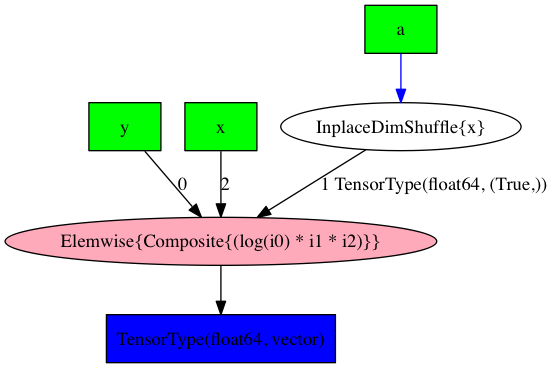

In [8]:
theano.printing.pydotprint(compiled_expr, outfile="graph.png", var_with_name_simple=True)
Image('./graph.png')

## Exercises

In [8]:
# create two vectors and two scalars
x = T.vector() 
y = T.vector()
alpha = T.scalar()
beta = T.scalar()

# define values for each variable 
x_val = numpy.arange(10)
y_val = numpy.arange(10)
alpha_val = 0.1
beta_val = 0.3

* compute $z = (x_1 + y_1^2, x_2 + y_2^2, ...)^T$: define theano function and evaluate it

* compute $||x||$

* compute $(<x, \alpha y> + <\beta x, y>)^2$

# Shared variables

* The inputs and transformations only exist when function is called

* Shared variables always stay in memory like global variables
 * Shared variables can be included into a symbolic graph
 * They can be set and evaluated using special methods
   * but they can't change value arbitrarily during symbolic graph computation
   * we'll cover that later;
 
 
* Hint: such variables are a perfect place to store network parameters
 * e.g. weights or some metadata

In [ ]:
#creating shared variable
shared_vector_1 = theano.shared(np.ones(10,dtype='float64'))

In [ ]:

#evaluating shared variable (outside symbolicd graph)
print "initial value",shared_vector_1.get_value()

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

In [ ]:
#setting new value
shared_vector_1.set_value( np.arange(5) )

#getting that new value
print "new value", shared_vector_1.get_value()

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

## Almost done - Updates

* updates are a way of changing shared variables at after function call.

* technically it's a dictionary {shared_variable : a recipe for new value} which is has to be provided when function is compiled

That's how it works:

In [ ]:
# Multiply shared vector by a number and save the product back into shared vector

inputs = [input_scalar]
outputs = [scalar_times_shared] #return vector times scalar

my_updates = {
    shared_vector_1:scalar_times_shared #and write this same result bach into shared_vector_1
}

compute_and_save = theano.function(inputs, outputs, updates=my_updates)

In [ ]:
shared_vector_1.set_value(np.arange(5))

#initial shared_vector_1
print "initial shared value:" ,shared_vector_1.get_value()

# evaluating the function (shared_vector_1 will be changed)
print "compute_and_save(2) returns",compute_and_save(2)

#evaluate new shared_vector_1
print "new shared value:" ,shared_vector_1.get_value()



## Exercise

Write a recipe (transformation) that computes an elementwise transformation of `shared_vector` and `input_scalar`
Compile as a function of `input_scalar`

In [2]:
input_scalar = T.scalar('coefficient',dtype='float32')

scalar_times_shared = <student.write_recipe()>

shared_times_n = <student.compile_function()>

SyntaxError: invalid syntax (<ipython-input-2-e98c05a76760>, line 3)

In [ ]:
print "shared:", shared_vector_1.get_value()

print "shared_times_n(5)",shared_times_n(5)

print "shared_times_n(-0.5)",shared_times_n(-0.5)

In [ ]:
#Changing value of vector 1 (output should change)
shared_vector_1.set_value([-1,0,1])
print "shared:", shared_vector_1.get_value()

print "shared_times_n(5)",shared_times_n(5)

print "shared_times_n(-0.5)",shared_times_n(-0.5)


## Gradient

## Gradient, T.grad - why theano matters
* Theano can compute derivatives and gradients automatically
* Derivatives are computed symbolically, not numerically

Limitations:
* You can only compute a gradient of a __scalar__ transformation over one or several scalar or vector (or tensor) transformations or inputs.
* A transformation has to have float32 or float64 dtype throughout the whole computation graph
 * derivative over an integer has no mathematical sense


### 1D gradient (derivative)

In [16]:
x = T.scalar(name='x') 
function1d = x ** 2 + T.log(x)
function1d_derivative = T.grad(function1d, x)

In [17]:
# result of analytical differentiation:
theano.pprint(function1d_derivative)

'(((fill(((x ** TensorConstant{2}) + log(x)), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1}))) + (fill(((x ** TensorConstant{2}) + log(x)), TensorConstant{1.0}) / x))'

In [18]:
# let's compile it
compiled_derivative = theano.function([x], function1d_derivative)
compiled_f = theano.function([x], function1d)

In [19]:
# optimizations were done during compilation
theano.printing.debugprint(compiled_derivative)

Elemwise{Composite{((i0 * i1) + inv(i1))}} [id A] ''   0
 |TensorConstant{2.0} [id B]
 |x [id C]


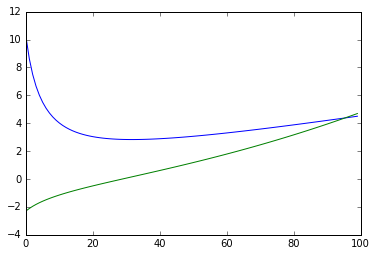

In [20]:
xarray = numpy.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point) for point in xarray])
plt.plot([compiled_f(point) for point in xarray])

### NDimensional gradient

In [21]:
x = T.vector(name='x') 
function = T.sum(x * x)
function_gradient = T.grad(function, x)

In [22]:
compiled_gradient = theano.function([x], function_gradient)

In [23]:
compiled_gradient([1, 2, 4, 0])

array([ 2.,  4.,  8.,  0.])

In [24]:
theano.printing.debugprint(compiled_gradient)

Elemwise{add,no_inplace} [id A] ''   0
 |x [id B]
 |x [id B]


## Why that rocks

In [ ]:

my_vector = T.vector('float64')

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = ((my_vector+my_scalar)**(1+T.var(my_vector)) +1./T.arcsinh(my_scalar)).mean()/(my_scalar**2 +1) + 0.01*T.sin(2*my_scalar**1.5)*(T.sum(my_vector)* my_scalar**2)*T.exp((my_scalar-4)**2)/(1+T.exp((my_scalar-4)**2))*(1.-(T.exp(-(my_scalar-4)**2))/(1+T.exp(-(my_scalar-4)**2)))**2


der_by_scalar,der_by_vector = <student.compute_grad_over_scalar_and_vector()>


compute_weird_function = theano.function([my_scalar,my_vector],weird_psychotic_function)
compute_der_by_scalar = theano.function([my_scalar,my_vector],der_by_scalar)


In [ ]:
#Plotting your derivative
vector_0 = [1,2,3]

scalar_space = np.linspace(0,7)

y = [compute_weird_function(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y,label='function')
y_der_by_scalar = [compute_der_by_scalar(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y_der_by_scalar,label='derivative')
plt.grid();plt.legend()


## Matrix

#### Compute $||Ax||^2$:

In [33]:
x = T.vector('x')
A = T.matrix('A')
z = A.dot(x)
normAx = theano.function([x, A], z.dot(z))
normAx([0, 2], [[1, 1], [1, 1]])

array(8.0)

## Exercises

* compile a function which takes an array $x$ with three elements and computes $x_0^3 + \sin{x_1}*\cos{x_2}$. Check it by computing at any point

* compute gradient for previous function w.r.t. x

* compute gradient for $||Ax|| + \alpha * ||x||$ 

# Logistic regression 

In [54]:
# import function to create toy dataset for classification
from sklearn.datasets import make_blobs, make_moons
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import roc_auc_score
# logistic function (we introduce shortcut sigmoid)
from scipy.special import expit as sigmoid

## Logistic regression description:

$p_i = \sigma(\sum_k X_{ik} w_k)$

$\text{llh}=\sum_i y_i \log{p_i} + (1-y_i)\log{(1 - p_i)}\qquad$  (here $y \in \{0, 1\}$)

$loss = -\text{llh}, \qquad loss \to \min$



## Exercise 

Write loss function and its gradient using theano (create compiled expressions).

**Use** `T.nnet.sigmoid`

Implement the regular logistic regression training algorithm

Tips:
* Weights fit in as a shared variable
* X and y are potential inputs
* Compile 2 functions:
 * train_function(X,y) - returns error and computes weights' new values __(through updates)__
 * predict_fun(X) - just computes probabilities ("y") given data
  
We shall train on a two-class MNIST dataset
* please note that target y are {0,1} and not {-1,1} as in some formulae

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits(2)

X,y = mnist.data, mnist.target


print "y [shape - %s]:"%(str(y.shape)),y[:10]

print "X [shape - %s]:"%(str(X.shape))
print X[:3]
print y[:10]

In [ ]:
# inputs and shareds
shared_weights = <student.code_me()>
input_X = <student.code_me()>
input_y = <student.code_me()>

In [ ]:
predicted_y = <predicted probabilities for input_X>
loss = <logistic loss (scalar, mean over sample)>

grad = <gradient of loss over model weights>

updates = {
    shared_weights: <new weights after gradient step>
}

Now we have expessions for loss and its gradient and we need to use some optimization method

In [ ]:
train_function = <compile function that takes X and y, returns log loss and updates weights>
predict_function = <compile function that takes X and computes probabilities of y>

In [ ]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from sklearn.metrics import roc_auc_score

for i in range(5):
    loss_i = train_function(X_train,y_train)
    print "loss at iter %i:%.4f"%(i,loss_i)
    print "train auc:",roc_auc_score(y_train,predict_function(X_train))
    print "test auc:",roc_auc_score(y_test,predict_function(X_test))

    
print "resulting weights:"
plt.imshow(shared_weights.get_value().reshape(8,-1))
plt.colorbar()

In [1]:
# It's time to plot ROC curve
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve

y_pred = predict_function(X_test)

plt.plot(*roc_curve(y_test,y_pred, lw=3))
plt.xlabel("1 - background rejection")
plt.ylabel("Signal efficiency")
